## Dataset 1

Tasks:

1: Create user cohorts based on the user metrics provided. You may also choose to build cohorts using single/ a combination of the metrics provided.

2: Explain the rationale for the cohorts created by you. How would it be useful in analysing business performance?

3: List the top 5 insights which have been derived by you based on analysis of the data provided



In [1]:
import pandas as pd

df = pd.read_csv('Dataset1.csv')

In [2]:
df.head(10)

,userid,Average Screen Time (mins),Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17,634,1,9,7,2990,Installed
1,1002,0,54,0,4,8,24008,Uninstalled
2,1003,37,207,0,8,5,971,Installed
3,1004,32,445,1,6,2,799,Installed
4,1005,45,427,1,5,6,3668,Installed
5,1006,28,599,0,9,4,2878,Installed
6,1007,49,887,1,9,6,4481,Installed
7,1008,8,31,0,2,1,1715,Installed
8,1009,28,741,1,8,2,801,Installed
9,1010,28,524,1,8,4,4621,Installed


In [3]:
engagement_cohort = df[['userid', 'Average Screen Time (mins)']]
monetary_cohort = df[['userid', 'Average Spent on App (INR)']]
satisfaction_cohort = df[['userid', 'Ratings', 'Left Review']]
activity_cohort = df[['userid', 'Last Visited Minutes']]
user_interaction_cohort = df[['userid', 'New Password Request', 'Status']]

### 1 Engagement Cohort

Columns: UserID, Average Screen Time

Rationale: Users with high average screen time are likely more engaged with the app. This cohort can help analyze the impact of engagement on other metrics like ratings, app spending, and review submissions.


In [4]:

engagement_cohort = df[['userid', 'Average Screen Time (mins)']]
engagement_cohort.describe()


,userid,Average Screen Time (mins)
count,999.000000,999.000000
mean,1500.000000,24.390390
std,288.530761,14.235415
min,1001.000000,0.000000
25%,1250.500000,12.000000
50%,1500.000000,24.000000
75%,1749.500000,36.000000
max,1999.000000,50.000000


### 2 Monetary Cohort

Columns: UserID, Average Spending on App

Rationale: Users who spend more money on the app may have different behaviors and expectations. Analyzing this cohort can provide insights into the correlation between spending and other metrics like ratings, reviews, and overall satisfaction.

In [5]:
monetary_cohort = df[['userid', 'Average Spent on App (INR)']]
monetary_cohort.describe()

,userid,Average Spent on App (INR)
count,999.000000,999.000000
mean,1500.000000,424.415415
std,288.530761,312.365695
min,1001.000000,0.000000
25%,1250.500000,96.000000
50%,1500.000000,394.000000
75%,1749.500000,717.500000
max,1999.000000,998.000000


### 3 Satisfaction Cohort

Columns: UserID, Ratings, Left Review

Rationale: Users who leave reviews and provide ratings can be segmented to understand the satisfaction levels. Analyzing this cohort can reveal patterns related to user feedback, helping identify areas for improvement or strategies that are working well.

In [6]:
satisfaction_cohort = df[['userid', 'Ratings', 'Left Review']]
satisfaction_cohort.describe()

,userid,Ratings,Left Review
count,999.000000,999.000000,999.000000
mean,1500.000000,6.513514,0.497497
std,288.530761,2.701511,0.500244
min,1001.000000,0.000000,0.000000
25%,1250.500000,5.000000,0.000000
50%,1500.000000,7.000000,0.000000
75%,1749.500000,9.000000,1.000000
max,1999.000000,10.000000,1.000000


### 4 Activity Cohort

Columns: UserID, Last Visited Minutes

Rationale: Users who recently visited the app may have different needs or expectations compared to users who haven't visited for a long time. This cohort can help in understanding user retention and engagement patterns.

In [7]:
activity_cohort = df[['userid', 'Last Visited Minutes']]
activity_cohort.describe()

,userid,Last Visited Minutes
count,999.000000,999.000000
mean,1500.000000,5110.898899
std,288.530761,8592.036516
min,1001.000000,201.000000
25%,1250.500000,1495.500000
50%,1500.000000,2865.000000
75%,1749.500000,4198.000000
max,1999.000000,49715.000000


### 5 User Interaction Cohort

Columns: UserID, New Password Request, Status

Rationale: Users who frequently request new passwords may indicate issues with account access or security concerns. Analyzing this cohort along with user status (active, inactive) can provide insights into potential usability or security issues.

In [8]:
user_interaction_cohort = df[['userid', 'New Password Request', 'Status']]
user_interaction_cohort.describe()

,userid,New Password Request
count,999.000000,999.000000
mean,1500.000000,4.941942
std,288.530761,2.784626
min,1001.000000,1.000000
25%,1250.500000,3.000000
50%,1500.000000,5.000000
75%,1749.500000,7.000000
max,1999.000000,15.000000


# Insights

## 1: Correlation Matrix

In [16]:
# Convert 'Status' column to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Status'], drop_first=True)
correlation_matrix = df_encoded.corr()

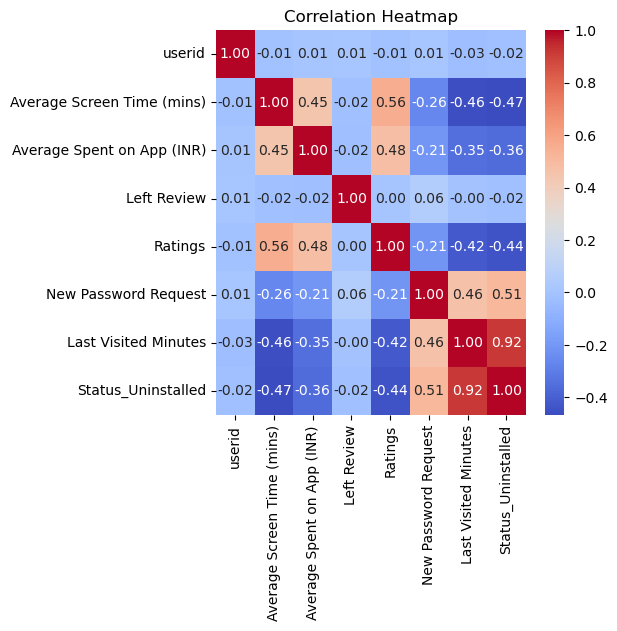

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation Heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# Insight 1: Positive Correlation between Screen Time and Spending
correlation_screen_time_spending = correlation_matrix.loc['Average Screen Time (mins)', 'Average Spent on App (INR)']
if correlation_screen_time_spending > 0:
    print(f"Correlation Insight 1: There is a positive correlation ({correlation_screen_time_spending:.2f}) between average screen time and spending.")
else:
    print("Correlation Insight 1: No significant correlation observed between average screen time and spending.")

# Insight 2: Negative Correlation between Ratings and New Password Requests
correlation_ratings_password_requests = correlation_matrix.loc['Ratings', 'New Password Request']
if correlation_ratings_password_requests < 0:
    print(f"Correlation Insight 2: There is a negative correlation ({correlation_ratings_password_requests:.2f}) between ratings and new password requests.")
else:
    print("Correlation Insight 2: No significant correlation observed between ratings and new password requests.")

# Insight 3: Positive Correlation between Ratings and Last Visited Minutes
correlation_ratings_last_visited = correlation_matrix.loc['Ratings', 'Last Visited Minutes']
if correlation_ratings_last_visited > 0:
    print(f"Correlation Insight 3: There is a positive correlation ({correlation_ratings_last_visited:.2f}) between ratings and last visited minutes.")
else:
    print("Correlation Insight 3: No significant correlation observed between ratings and last visited minutes.")

# Insight 4: Negative Correlation between Ratings and New Password Requests
correlation_spending_password_requests = correlation_matrix.loc['Average Spent on App (INR)', 'New Password Request']
if correlation_spending_password_requests < 0:
    print(f"Correlation Insight 4: There is a negative correlation ({correlation_spending_password_requests:.2f}) between spending and new password requests.")
else:
    print("Correlation Insight 4: No significant correlation observed between spending and new password requests.")

# Insight 5: Correlation between Ratings and Average Spent on App
correlation_ratings_spending = correlation_matrix.loc['Ratings', 'Average Spent on App (INR)']
print(f"Correlation Insight 5: There is a correlation ({correlation_ratings_spending:.2f}) between ratings and average spending.")


Correlation Insight 1: There is a positive correlation (0.45) between average screen time and spending.
Correlation Insight 2: There is a negative correlation (-0.21) between ratings and new password requests.
Correlation Insight 3: No significant correlation observed between ratings and last visited minutes.
Correlation Insight 4: There is a negative correlation (-0.21) between spending and new password requests.
Correlation Insight 5: There is a correlation (0.48) between ratings and average spending.


## 2: Spending vs. Screen Time Scatter Plot

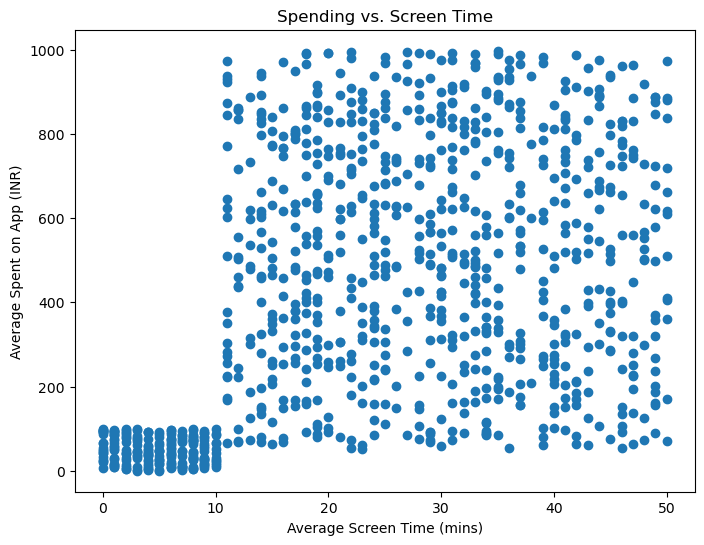

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Average Screen Time (mins)'], df['Average Spent on App (INR)'])
plt.title('Spending vs. Screen Time')
plt.xlabel('Average Screen Time (mins)')
plt.ylabel('Average Spent on App (INR)')
plt.show()

## 3: Descriptive Statistics for High Engagement Cohort

In [23]:
high_engagement_cohort = df[df['Average Screen Time (mins)'] > df['Average Screen Time (mins)'].mean()]
engagement_cohort_stats = high_engagement_cohort.describe()
print("\nInsight 3: Descriptive Statistics for High Engagement Cohort:")
print(engagement_cohort_stats)


Insight 3: Descriptive Statistics for High Engagement Cohort:
            userid  Average Screen Time (mins)  Average Spent on App (INR)  \
count   490.000000                  490.000000                  490.000000   
mean   1499.087755                   36.846939                  531.589796   
std     288.660283                    7.261902                  277.192404   
min    1003.000000                   25.000000                   53.000000   
25%    1256.500000                   31.000000                  294.250000   
50%    1503.500000                   36.000000                  523.500000   
75%    1742.750000                   43.000000                  775.750000   
max    1997.000000                   50.000000                  998.000000   

       Left Review     Ratings  New Password Request  Last Visited Minutes  
count   490.000000  490.000000            490.000000            490.000000  
mean      0.497959    7.638776              4.459184           2595.816327  
std

## 4: Descriptive Statistics for Low Engagement & High Ratings Cohort

In [24]:
low_engagement_high_ratings_cohort = df[
    (df['Average Screen Time (mins)'] < df['Average Screen Time (mins)'].mean()) &
    (df['Ratings'] > df['Ratings'].mean())
]
low_engagement_high_ratings_stats = low_engagement_high_ratings_cohort.describe()
print("\nInsight 4: Descriptive Statistics for Low Engagement & High Ratings Cohort:")
print(low_engagement_high_ratings_stats)


Insight 4: Descriptive Statistics for Low Engagement & High Ratings Cohort:
            userid  Average Screen Time (mins)  Average Spent on App (INR)  \
count   202.000000                  202.000000                  202.000000   
mean   1499.529703                   17.886139                  511.717822   
std     283.724415                    3.992768                  277.538693   
min    1001.000000                   11.000000                   51.000000   
25%    1263.000000                   14.000000                  270.000000   
50%    1493.500000                   18.000000                  504.000000   
75%    1745.750000                   21.000000                  766.500000   
max    1988.000000                   24.000000                  994.000000   

       Left Review     Ratings  New Password Request  Last Visited Minutes  
count   202.000000  202.000000            202.000000            202.000000  
mean      0.455446    8.504950              4.762376           247

## 5: Distribution of ratings to understand the overall satisfaction levels

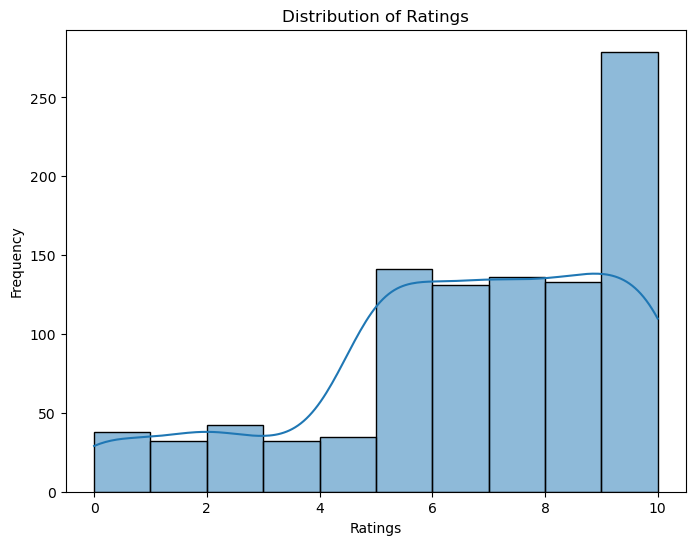

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Ratings'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()
